In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("dengue.csv").dropna()
feat = ['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']

In [3]:
X = (data[feat] - np.mean(data[feat]))/np.std(data[feat])
X = np.array(X)

In [4]:
k_list = range(2,12)
sil_score = np.zeros(len(k_list))
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    sil_score[k-min(k_list)] = silhouette_score(X, labels)

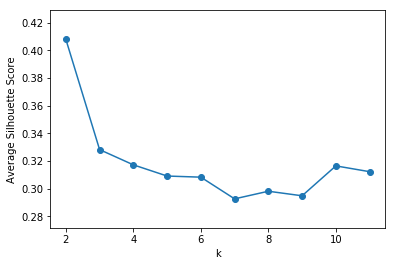

In [5]:
plt.scatter(k_list, sil_score)
plt.plot(k_list, sil_score)
plt.xlabel('k')
plt.ylabel('Average Silhouette Score')
plt.show()

In [6]:
data1 = pd.read_csv("BreadBasket_DMS.csv").dropna()

In [7]:
data1["Time"] = pd.to_datetime(data1.Time)
data1["Date"] = pd.to_datetime(data1.Date)
data1['time'] = data1.Time.dt.hour
data1['date_y'] = data1.Date.dt.year
data1['date_m'] = data1.Date.dt.month
data1['date_d'] = data1.Date.dt.day

In [8]:
data1[['time','date_y','date_m','date_d','Transaction']] = (data1[['time','date_y','date_m','date_d','Transaction']] - np.mean(data1[['time','date_y','date_m','date_d','Transaction']]))/np.std(data1[['time','date_y','date_m','date_d','Transaction']])

In [9]:
#esto es solo para ver el numero de ventas de cada producto como funcion del mes
dic_item = {}
for item in set(data1["Item"]):
    a = data1[data1["Item"] == item]
    month = list(a.Date.dt.month)
    dic = {}
    for m in range(1,13):
        dic[m] = month.count(m)
    dic_item[item] = dic

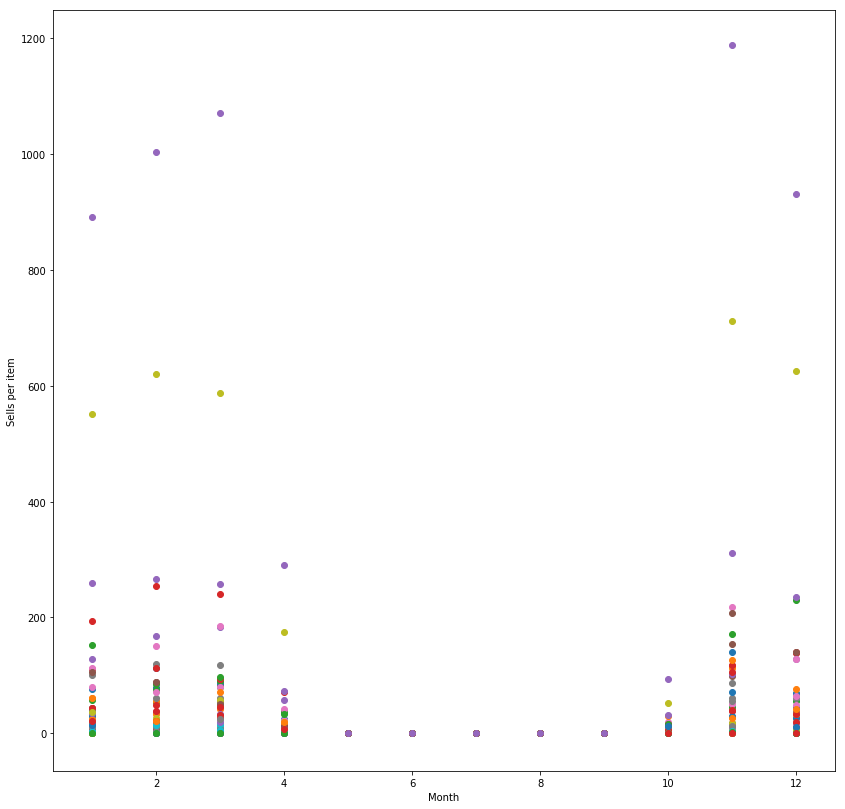

In [10]:
plt.figure(figsize=(14,14))
for i in dic_item.keys():
    plt.scatter(dic_item[i].keys(),dic_item[i].values())
    #plt.text(dic_item[i].keys(),dic_item[i].values(),i,fontsize=12,color='DodgerBlue')
#plt.legend()
plt.xlabel('Month')
plt.ylabel('Sells per item')
plt.show()

In [11]:
#como funcion de la fecha en anhos
X11 = np.array(data1[['time','date_y','Transaction']])
item = np.array(data1['Item'])
X2, X1, y_train, item1 = train_test_split(X11, item, test_size=0.05)

In [12]:
#PCA para los datos
pca1 = PCA()
pca1.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
comp = pca1.components_

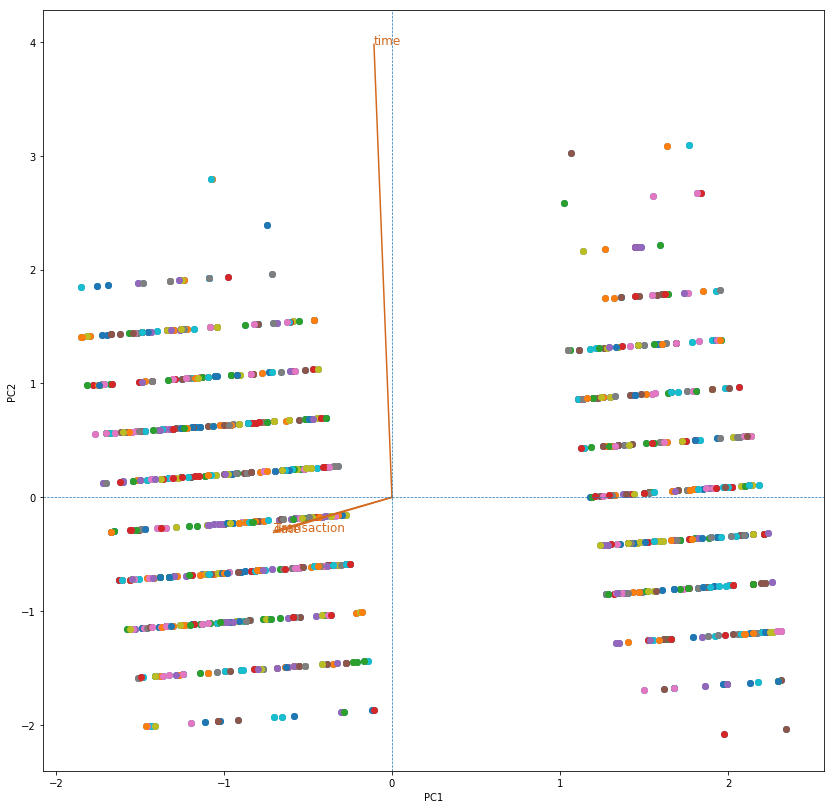

In [14]:
plt.figure(figsize=(14,14))
trans1 = pca1.fit_transform(X1)
plt.scatter(trans1[:,0],trans1[:,1])
for i in range(len(trans1)):
    plt.scatter(trans1[i,0],trans1[i,1])
    #plt.text(trans1[i,0],trans1[i,1], item[i], fontsize=12,color='DodgerBlue')
    
plt.plot([0.,comp[0,0]],[0.,4*comp[1,0]],c='Chocolate')
plt.text(comp[0,0], 4*comp[1,0], 'time', fontsize=12,color='Chocolate')
plt.plot([0.,comp[0,1]],[0.,4*comp[1,1]],c='Chocolate')
plt.text(comp[0,1], 4*comp[1,1], 'date', fontsize=12,color='Chocolate')
plt.plot([0.,comp[0,2]],[0.,4*comp[1,2]],c='Chocolate')
plt.text(comp[0,2], 4*comp[1,2], 'Transaction', fontsize=12,color='Chocolate')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0,linestyle='--',linewidth=0.7)
plt.axvline(0,linestyle='--',linewidth=0.7)
#plt.legend()
plt.show()

In [15]:
#k-means
k1_list = range(2,20)
sil_score1 = np.zeros(len(k1_list))
for k in k1_list:
    kmeans1 = KMeans(n_clusters=k)
    labels1 = kmeans1.fit_predict(X1)
    sil_score1[k-min(k1_list)] = silhouette_score(X1, labels1)

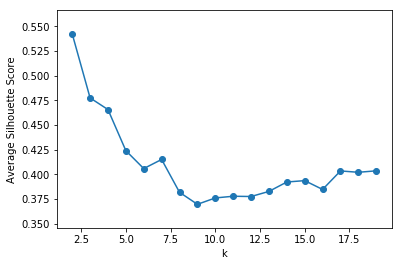

In [16]:
plt.scatter(k1_list, sil_score1)
plt.plot(k1_list, sil_score1)
plt.xlabel('k')
plt.ylabel('Average Silhouette Score')
plt.show()

In [17]:
print('el numero de clusters apropiado es:', k1_list[np.argmax(sil_score1)])

el numero de clusters apropiado es: 2


In [18]:
kmeans2 = KMeans(n_clusters=k1_list[np.argmax(sil_score1)])
labels2 = kmeans1.fit_predict(X1)

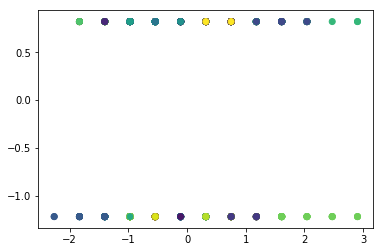

In [19]:
plt.scatter(X1[:,0],X1[:,1],c=labels2)

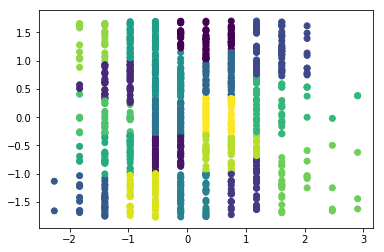

In [20]:
plt.scatter(X1[:,0],X1[:,2],c=labels2)

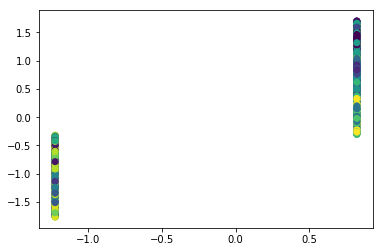

In [21]:
plt.scatter(X1[:,1],X1[:,2],c=labels2)

In [47]:
print('aca se ve que el numero de clusters es:', k1_list[np.argmax(sil_score1)])

aca se ve que el numero de clusters es: 7


In [48]:
#Los 2 clusters corresponden a los dos anhos en los que se tienen datos (2016 y 2017)

In [23]:
#como funcion de la fecha en meses
X11 = np.array(data1[['time','date_m','Transaction']])
item = np.array(data1['Item'])
X2, X1, y_train, item1 = train_test_split(X11, item, test_size=0.05)
#PCA para los datos
pca1 = PCA()
pca1.fit(X1)
comp = pca1.components_

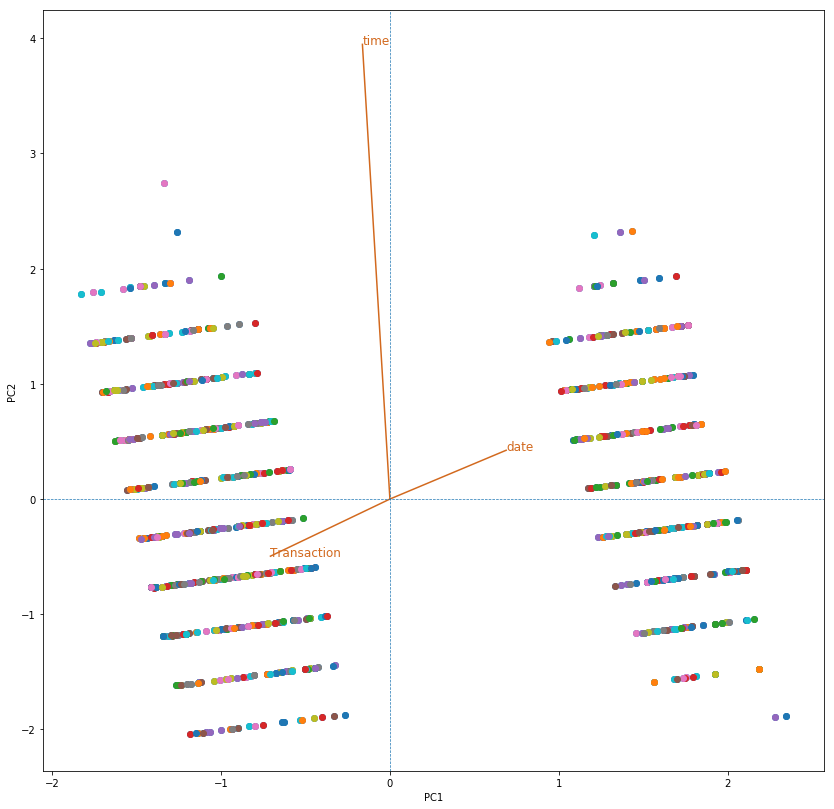

In [24]:
plt.figure(figsize=(14,14))
trans1 = pca1.fit_transform(X1)
plt.scatter(trans1[:,0],trans1[:,1])
for i in range(len(trans1)):
    plt.scatter(trans1[i,0],trans1[i,1])
    #plt.text(trans1[i,0],trans1[i,1], item[i], fontsize=12,color='DodgerBlue')
    
plt.plot([0.,comp[0,0]],[0.,4*comp[1,0]],c='Chocolate')
plt.text(comp[0,0], 4*comp[1,0], 'time', fontsize=12,color='Chocolate')
plt.plot([0.,comp[0,1]],[0.,4*comp[1,1]],c='Chocolate')
plt.text(comp[0,1], 4*comp[1,1], 'date', fontsize=12,color='Chocolate')
plt.plot([0.,comp[0,2]],[0.,4*comp[1,2]],c='Chocolate')
plt.text(comp[0,2], 4*comp[1,2], 'Transaction', fontsize=12,color='Chocolate')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0,linestyle='--',linewidth=0.7)
plt.axvline(0,linestyle='--',linewidth=0.7)
#plt.legend()
plt.show()

In [43]:
#Los 2 clusters que aparecen corresponden a las dos epocas en las que mas se venden productos, anteriormente hay una grafica
#que muestra que los meses del 5 al 9 son 'muertos'.

In [25]:
#k-means
k1_list = range(2,20)
sil_score1 = np.zeros(len(k1_list))
for k in k1_list:
    kmeans1 = KMeans(n_clusters=k)
    labels1 = kmeans1.fit_predict(X1)
    sil_score1[k-min(k1_list)] = silhouette_score(X1, labels1)

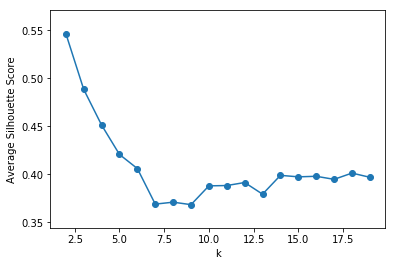

In [26]:
plt.scatter(k1_list, sil_score1)
plt.plot(k1_list, sil_score1)
plt.xlabel('k')
plt.ylabel('Average Silhouette Score')
plt.show()

In [27]:
print('el numero de clusters apropiado es:', k1_list[np.argmax(sil_score1)])

el numero de clusters apropiado es: 2


In [28]:
kmeans2 = KMeans(n_clusters=k1_list[np.argmax(sil_score1)])
labels2 = kmeans1.fit_predict(X1)

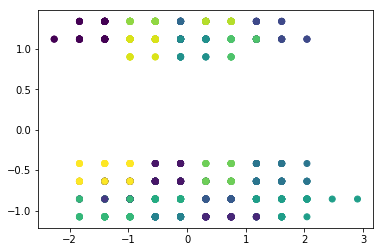

In [29]:
plt.scatter(X1[:,0],X1[:,1],c=labels2)

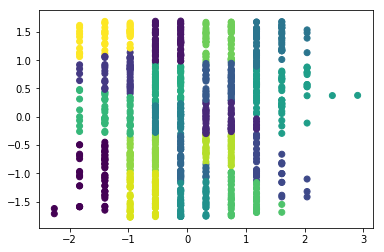

In [30]:
plt.scatter(X1[:,0],X1[:,2],c=labels2)

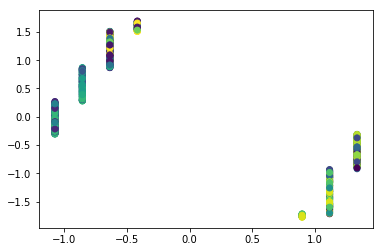

In [31]:
plt.scatter(X1[:,1],X1[:,2],c=labels2)

In [46]:
print('Aca se ve que el numero de clusters optimo es: ',k1_list[np.argmax(sil_score1)])

Aca se ve que el numero de clusters optimo es:  7


In [49]:
#se ven 2 clusters que corresponden a los meses en los que mas se venden cosas (los primeros 4 y los ultimos 2 o 3)

In [32]:
#como funcion de la fecha en dias
X11 = np.array(data1[['time','date_d','Transaction']])
item = np.array(data1['Item'])
X2, X1, y_train, item1 = train_test_split(X11, item, test_size=0.05)
#PCA para los datos
pca1 = PCA()
pca1.fit(X1)
comp = pca1.components_

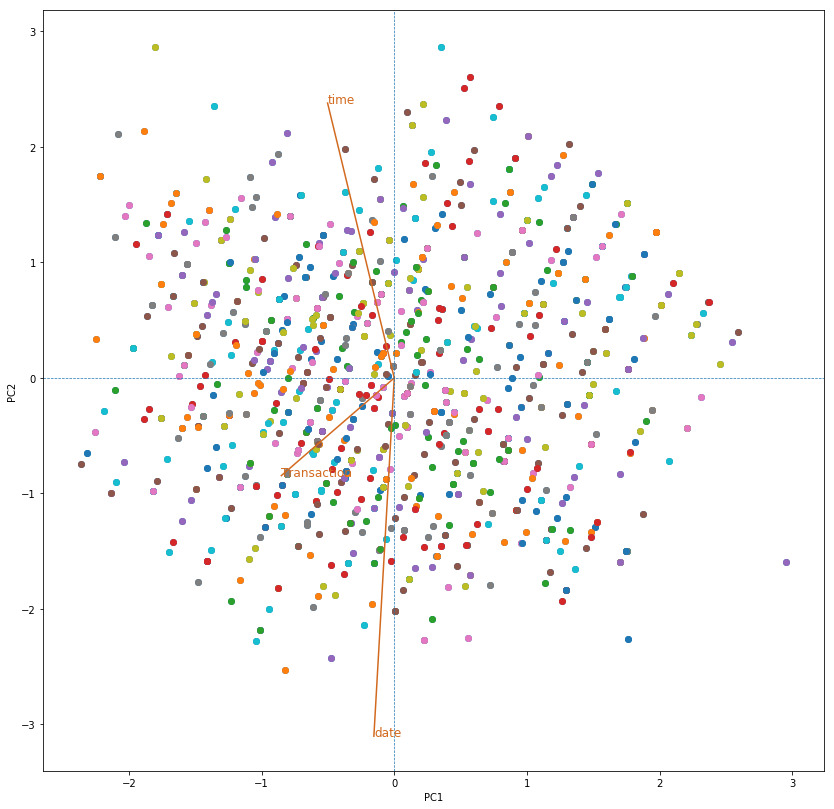

In [33]:
plt.figure(figsize=(14,14))
trans1 = pca1.fit_transform(X1)
plt.scatter(trans1[:,0],trans1[:,1])
for i in range(len(trans1)):
    plt.scatter(trans1[i,0],trans1[i,1])
    #plt.text(trans1[i,0],trans1[i,1], item[i], fontsize=12,color='DodgerBlue')
    
plt.plot([0.,comp[0,0]],[0.,4*comp[1,0]],c='Chocolate')
plt.text(comp[0,0], 4*comp[1,0], 'time', fontsize=12,color='Chocolate')
plt.plot([0.,comp[0,1]],[0.,4*comp[1,1]],c='Chocolate')
plt.text(comp[0,1], 4*comp[1,1], 'date', fontsize=12,color='Chocolate')
plt.plot([0.,comp[0,2]],[0.,4*comp[1,2]],c='Chocolate')
plt.text(comp[0,2], 4*comp[1,2], 'Transaction', fontsize=12,color='Chocolate')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0,linestyle='--',linewidth=0.7)
plt.axvline(0,linestyle='--',linewidth=0.7)
#plt.legend()
plt.show()

In [44]:
#como funcion del dia se ve que no hay patrones visibles (todo se vende relativamente igual)

In [34]:
#k-means
k1_list = range(2,20)
sil_score1 = np.zeros(len(k1_list))
for k in k1_list:
    kmeans1 = KMeans(n_clusters=k)
    labels1 = kmeans1.fit_predict(X1)
    sil_score1[k-min(k1_list)] = silhouette_score(X1, labels1)

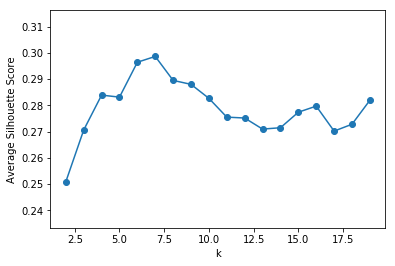

In [35]:
plt.scatter(k1_list, sil_score1)
plt.plot(k1_list, sil_score1)
plt.xlabel('k')
plt.ylabel('Average Silhouette Score')
plt.show()

In [36]:
print('el numero de clusters apropiado es:', k1_list[np.argmax(sil_score1)])

el numero de clusters apropiado es: 7


In [50]:
#el numero de clusters corresponde con el numero de dias de la semana (tambien tiene sentido)

In [37]:
kmeans2 = KMeans(n_clusters=k1_list[np.argmax(sil_score1)])
labels2 = kmeans1.fit_predict(X1)

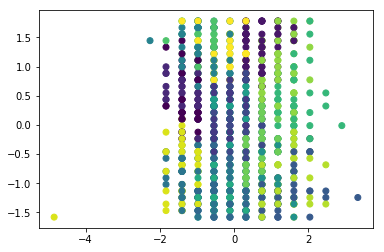

In [38]:
plt.scatter(X1[:,0],X1[:,1],c=labels2)

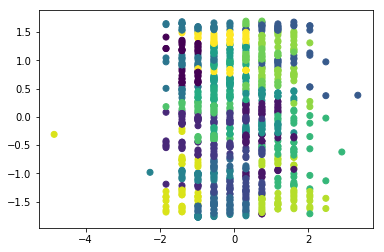

In [39]:
plt.scatter(X1[:,0],X1[:,2],c=labels2)

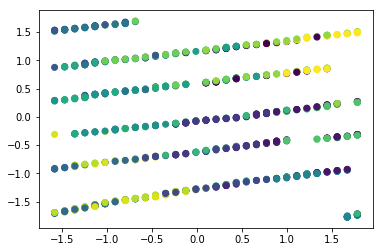

In [41]:
plt.scatter(X1[:,1],X1[:,2],c=labels2)